In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv("/content/Google_Stock_Price_Train.csv",thousands=",")
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,623400
1254,12/27/2016,790.68,797.86,787.66,791.55,789100
1255,12/28/2016,793.70,794.23,783.20,785.05,1153800
1256,12/29/2016,783.33,785.93,778.92,782.79,744300


Text(0, 0.5, 'Stock Volume')

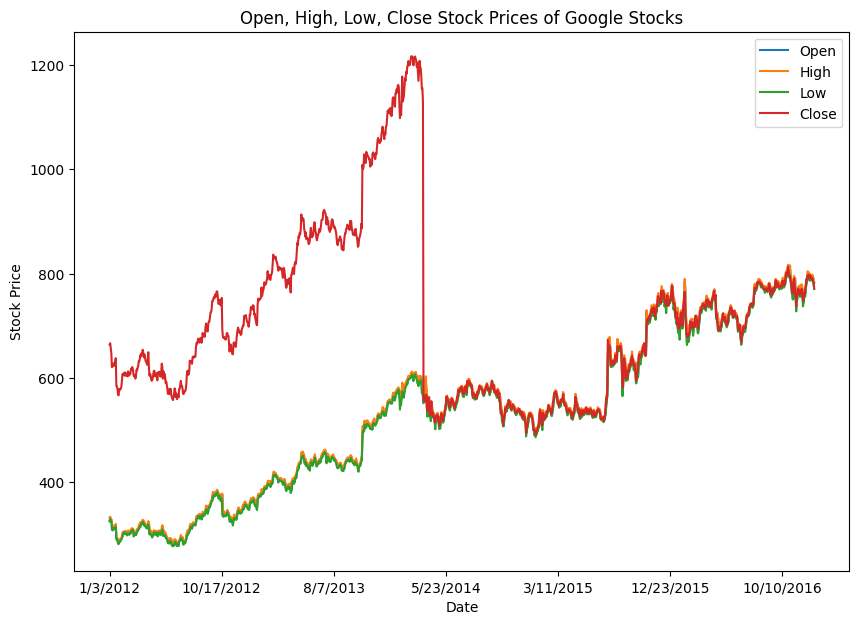

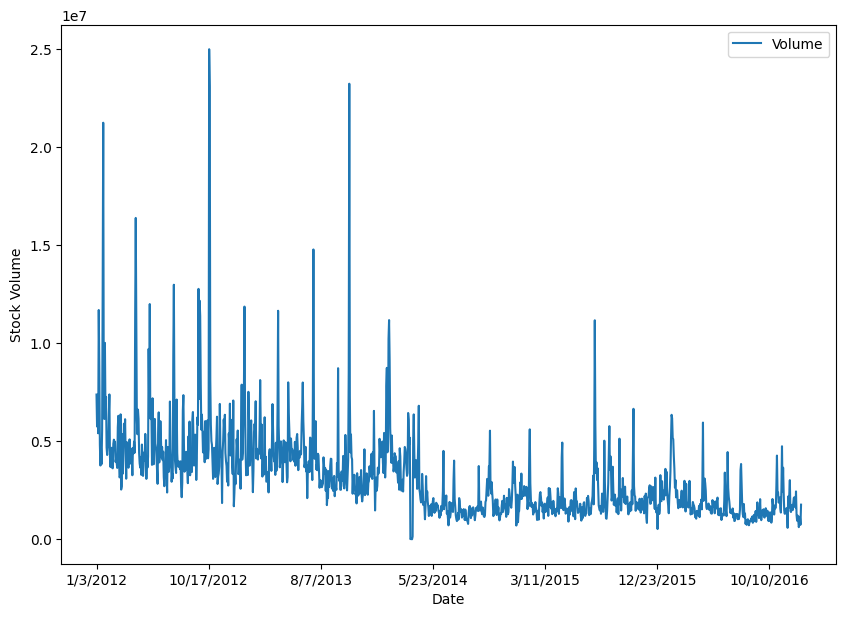

In [3]:
ax1 = data.plot(x="Date", y=["Open", "High", "Low", "Close"], figsize=(10,7),title='Open, High, Low, Close Stock Prices of Google Stocks')
ax1.set_ylabel("Stock Price")

ax2 = data.plot(x="Date", y=["Volume"],  figsize=(10,7))
ax2.set_ylabel("Stock Volume")


In [4]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

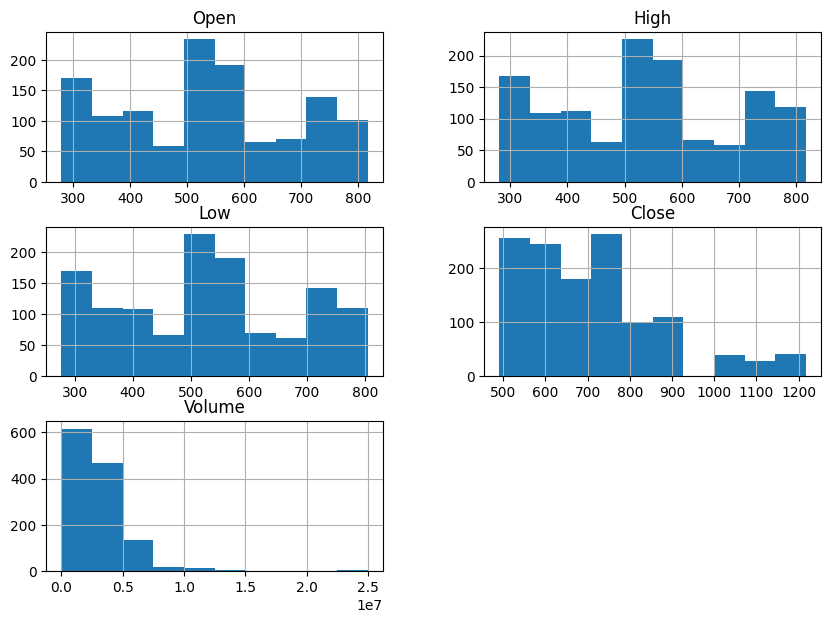

In [5]:
data.hist(figsize=(10,7))
plt.show()

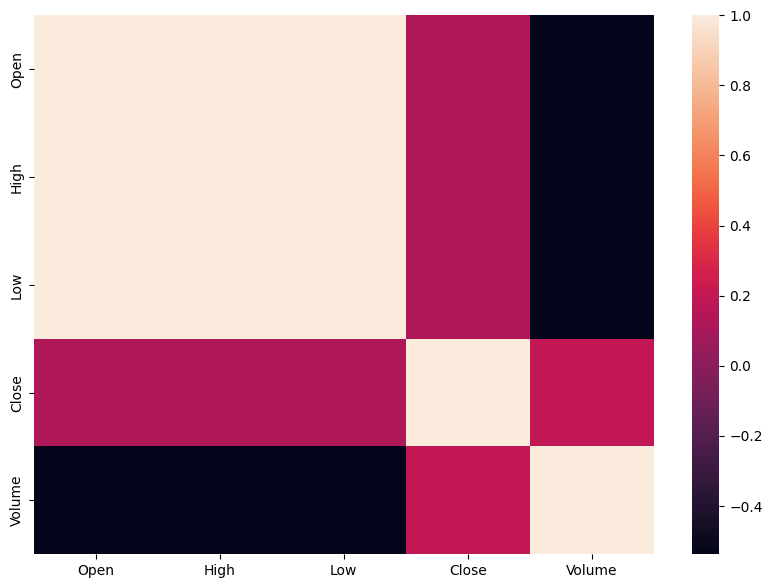

In [8]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(data.drop("Date", axis=1).corr())
plt.show()


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [10]:
time_step = 100
X, y = [], []
for i in range(len(scaled_data) - time_step - 1):
  X.append(scaled_data[i:(i + time_step), 0])
  y.append(scaled_data[i + time_step, 0])

X=np.array(X)
y=np.array(y)

In [11]:
split_ratio= 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

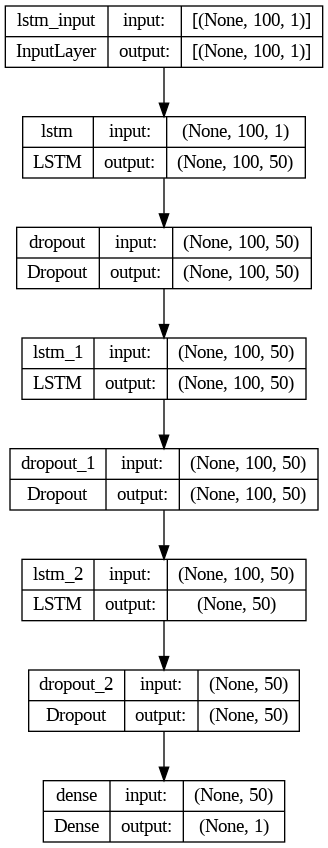

In [13]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [14]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
29/29 [==============================] - 11s 171ms/step - loss: 0.0404
Epoch 2/5
29/29 [==============================] - 4s 138ms/step - loss: 0.0101
Epoch 3/5
29/29 [==============================] - 5s 175ms/step - loss: 0.0082
Epoch 4/5
29/29 [==============================] - 5s 153ms/step - loss: 0.0084
Epoch 5/5
29/29 [==============================] - 4s 136ms/step - loss: 0.0067


In [15]:
loss = model.evaluate(X_test, y_test)

8/8 [==============================] - 2s 37ms/step - loss: 7.9241e-04


In [16]:
predictions = model.predict(X_test)

8/8 [==============================] - 2s 53ms/step


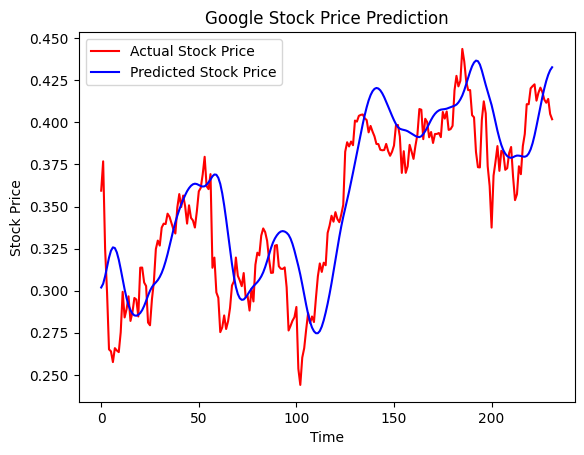

In [17]:
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2score= r2_score(y_test,predictions)
print("RMSE is :",rmse)
print("R2 Score is :",r2score)

RMSE is : 0.02814969814474746
R2 Score is : 0.6538057800696313
